# Project: Wrangling and Analyze Data

## Importing Libraries

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import tweepy
import json
import requests
import os
from datetime import datetime
%matplotlib inline

# Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

### Defining Path of Working Directory

In [5]:
# Working Directory Path
working_dir = '/'

## 1. Reading downloaded dataset into Pandas Dataframe

#### Renaming file downloaded/provided: twitter-archive-enhanced.csv

In [ ]:
# Defining File Path
old_name = working_dir + 'twitter-archive-enhanced.csv' #filename with hyphen (-)
new_name = working_dir + 'twitter_archive_enhanced.csv' #filename with undescore (_)

# Renaming the file
os.rename(old_name, new_name)

In [ ]:
# Confirming file rename
os.listdir(working_dir)

['wrangle_act.ipynb',
 'project2.ipynb',
 'twitter_archive_enhanced.csv',
 'image_predictions_folder',
 'tweet_json.txt']

In [ ]:
# Specifying path of twitter_archive dataset
twitter_archive_path = '/content/drive/My Drive/Colab_Notebooks/ALX_2/twitter_archive_enhanced.csv'

# Reading path
twitter_archive_df = pd.read_csv(twitter_archive_path)

In [ ]:
# Checking columns in dataframe

twitter_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [ ]:
twitter_archive_df.shape

(2356, 17)

## 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
# Defining path of folder
image_predictions_folder = '/content/drive/My Drive/Colab_Notebooks/ALX_2/image_predictions_folder'

# Creating directory if non-existent
if not os.path.exists(image_predictions_folder):
    os.makedirs(image_predictions_folder)

In [ ]:
# Checking if directory was created
os.listdir(working_dir)

['wrangle_act.ipynb',
 'project2.ipynb',
 'twitter-archive-enhanced.csv',
 'image_predictions_folder',
 'tweet_json.txt']

In [ ]:
# Checking contents of (created) directory
os.listdir(image_predictions_folder)

['image-predictions.tsv']

In [ ]:
# Defining URL
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# Using get method
image_predictions_resp = requests.get(url)

In [ ]:
# Checking type of object returned
type(image_predictions_resp)

requests.models.Response

In [ ]:
#print(image_predictions_resp.text)

#### Accessing Content and Writing to File

In [ ]:
# Writing to a file
with open(os.path.join(image_predictions_folder, url.split('/')[-1]), mode = 'wb') as file:
    file.write(image_predictions_resp.content)

In [ ]:
# Checking file was saved to disk
os.listdir(image_predictions_folder)

['image_predictions.tsv']

#### Renaming file downloaded programmatically: image-predictions.tsv

In [ ]:
# Defining File Path
old_name = working_dir + 'image_predictions_folder/image-predictions.tsv' #filename with hyphen (-)
new_name = working_dir + 'image_predictions_folder/image_predictions.tsv' #filename with undescore (_)

# Renaming the file
os.rename(old_name, new_name)

In [ ]:
# Confirming file rename
os.listdir(image_predictions_folder)

['image_predictions.tsv']

## 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

### Defining Tweepy Credentials

In [ ]:
# Consumer (API) key authentication
consumer_key = 'I1p0KOzJQYYJBJY1ajZIz7Yl5'
consumer_secret = '2uxcBKVgFc4yYJg8hcZedC30kivBIU3Xoddgk0x2NYMWLsWFXe'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)


# Access key authentication
access_token = '1193870818201264129-Q93Ow1UikBtBcFAkDW0pvEdnL3ylb9'
access_secret = 'XUtzOZkoMR396ZEJBK12CkY2w8eDMgwsSBTUVdwXtvUMz'

auth.set_access_token(access_token, access_secret)


# Set up the API with the authentication handler
api = tweepy.API(auth)

In [ ]:
tweet_id_list = twitter_archive_df['tweet_id'].tolist()

In [ ]:
len(tweet_id_list)

2356

In [ ]:
# Creating list to hold Tweet JSON Objects
tweet_status_json_list = []

In [ ]:
# Iterating to get tweet extended information from tweet_ids in tweet_id_list

for tweet_id in tweet_id_list:

  try:
    # Getting Status Object from API by tweet_id
    tweet_status = api.get_status(tweet_id, tweet_mode='extended') #Mode = Extended; for more information
  except tweepy.TweepError:
    continue

  #Converting Status Object to JSON Object
  json_str = json.dumps(tweet_status._json)

  #Appending JSON Object to list of JSON Objects
  tweet_status_json_list.append(json_str)


In [ ]:
# Checking length of 
len(tweet_status_json_list)

3230

In [ ]:
# Defining path of tweet_json.txt File

path = working_dir + 'tweet_json.txt'

In [ ]:
# Saving List of JSON Objects to tweet_json.txt File

with open(path, "w") as fhandle:
  for line in tweet_status_json_list:
    fhandle.write(f'{line}\n')

# Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Reading Datasets Gathered

####1.   Reading twitter-archive-enhanced.csv Dataset (File provided)

In [393]:
# Reading dataset: twitter-archive-enhanced.csv
twitter_archive_df = pd.read_csv(working_dir + 'twitter_archive_enhanced.csv')

In [394]:
# Checking columns in dataframe
twitter_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [395]:
# Shape of Dataframe
twitter_archive_df.shape

(2356, 17)

In [396]:
# Checking info
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [397]:
# Checking first 5 rows
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [398]:
# Checking datatypes of columns
twitter_archive_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [399]:
# Summary statistics of rating_numerator column
twitter_archive_df['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

* The rating_numerator is allowed to go past 10 (maximum is 1776), as the rating account permits that ("they're good dogs Brent")
* Hence, bigger values aren't inaccurate, therefore no cleaning required

In [400]:
# Summary statistics of rating_denominator column
twitter_archive_df['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

* The rating_denominator should always be 10 (maximum in the dataset is 170, minimum is 0)
* Hence, values greater/lesser than 10 are inaccurate, therefore cleaning is required

In [401]:
#check names in twitter archive dataset
twitter_archive_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

* Majority of the names are "None"
* Explore the names further below

In [402]:
none_names_df = twitter_archive_df[twitter_archive_df['name'] == 'None']
none_names_df.shape

(745, 17)

In [403]:
# Displaying some of the records with none names
none_names_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1506,691756958957883396,NaN,NaN,2016-01-25 22:58:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691756958...,10,10,None,None,None,None,None
655,791784077045166082,NaN,NaN,2016-10-27 23:30:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I'm not sure what this dog is d...,6.820881e+17,4.196984e+09,2015-12-30 06:37:25 +0000,"https://vine.co/v/iqMjlxULzbn,https://vine.co/...",12,10,None,None,None,None,None
334,832682457690300417,NaN,NaN,2017-02-17 20:05:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Prosperous good boy 13/10 socioeconomic af htt...,NaN,NaN,NaN,https://twitter.com/telegraph/status/832268302...,13,10,None,None,None,None,None
1718,680176173301628928,NaN,NaN,2015-12-25 00:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is patiently waiting to scare the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680176173...,10,10,None,None,None,pupper,None
2145,669926384437997569,NaN,NaN,2015-11-26 17:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never seen a dog so genuinely happy about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669926384...,12,10,None,None,None,None,None


* The records with "None" names need to be cleaned, as there is no dog with a "None" name; by convention

In [404]:
# Checking if there are retweets
retweets_archive_df = twitter_archive_df[twitter_archive_df['text'].str.contains("RT @")]
retweets_archive_df.shape

(181, 17)

In [405]:
# Displaying retweets
retweets_archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None


* There are retweets in the twitter_archive dataset, which require cleaning

#### Checking Dog Stages Columns

In [406]:
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
863,762471784394268675,NaN,NaN,2016-08-08 02:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Glenn. Being in public scares him. Fright...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762471784...,12,10,Glenn,None,None,None,None
636,793500921481273345,NaN,NaN,2016-11-01 17:12:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an extremely mediocre cop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793500921...,12,10,Fiona,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
2289,667174963120574464,NaN,NaN,2015-11-19 02:58:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarence. His face says he doesn't wan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667174963...,9,10,Clarence,None,None,None,None
179,857214891891077121,8.571567e+17,180670967.0,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
233,847842811428974592,NaN,NaN,2017-03-31 16:07:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Rontu. He is described as a pal, cuddl...",NaN,NaN,NaN,"https://www.gofundme.com/help-save-rontu,https...",12,10,Rontu,None,None,None,None
281,839290600511926273,NaN,NaN,2017-03-08 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,8.392899e+17,41198418.0,2017-03-08 01:41:24 +0000,https://twitter.com/alexmartindawg/status/8392...,10,10,None,None,None,pupper,None
2132,670079681849372674,NaN,NaN,2015-11-27 03:20:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fabio. He's a wonderful pup. Can't stay a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670079681...,10,10,Fabio,None,None,None,None
1147,726935089318363137,NaN,NaN,2016-05-02 00:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprout. He's just precious af. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726935089...,12,10,Sprout,None,None,None,None
1095,736392552031657984,NaN,NaN,2016-05-28 03:04:00 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to mad pupper. You know what you did...,NaN,NaN,NaN,https://vine.co/v/iEggaEOiLO3,13,10,mad,None,None,pupper,None


In [407]:
# Pupper Stage
pupper_df = twitter_archive_df[twitter_archive_df['pupper'] == 'pupper']
pupper_df.shape

(257, 17)

In [408]:
# Puppo Stage
puppo_df = twitter_archive_df[twitter_archive_df['puppo'] == 'puppo']
puppo_df.shape

(30, 17)

In [409]:
# Doggo Stage
doggo_df = twitter_archive_df[twitter_archive_df['doggo'] == 'doggo']
doggo_df.shape

(97, 17)

In [410]:
# Pupper Stage
floofer_df = twitter_archive_df[twitter_archive_df['floofer'] == 'floofer']
floofer_df.shape

(10, 17)

* The dog stages are pivoted into different columns, which requires cleaning (unpivoting)

####2.  Reading image_predictions.tsv Dataset (File Downloaded Programmatically)

In [411]:
# Reading dataset: image_predictions.tsv
image_pred_df = pd.read_csv(working_dir + 'image_predictions_folder/image_predictions.tsv', sep='\t', header=0)

In [412]:
# Checking columns in dataframe
image_pred_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [413]:
# Shape of Dataframe
image_pred_df.shape

(2075, 12)

In [414]:
# Checking info
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [415]:
# Checking datatypes of columns
image_pred_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [416]:
# Checking first 5 rows
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [417]:
# Checking sampled rows
image_pred_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
1737,821886076407029760,https://pbs.twimg.com/media/C2ftAxnWIAEUdAR.jpg,1,golden_retriever,0.266238,True,cocker_spaniel,0.223325,True,Irish_setter,0.151631,True
342,672256522047614977,https://pbs.twimg.com/media/CVRVvRMWEAIBKOP.jpg,1,ostrich,0.999004,False,Arabian_camel,0.000512,False,llama,0.000147,False
1610,801167903437357056,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True
400,673688752737402881,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,1,soft-coated_wheaten_terrier,0.340806,True,Sealyham_terrier,0.234898,True,kuvasz,0.203495,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
357,672609152938721280,https://pbs.twimg.com/media/CVWWdKLWEAEnSk7.jpg,1,microwave,0.981946,False,rotisserie,0.007472,False,television,0.005881,False
1575,796031486298386433,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,1,golden_retriever,0.893775,True,Labrador_retriever,0.070140,True,doormat,0.008419,False
932,703268521220972544,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,1,wool,0.525434,False,fur_coat,0.236391,False,kuvasz,0.038243,True
888,699079609774645248,https://pbs.twimg.com/media/CbOhMUDXIAACIWR.jpg,3,schipperke,0.667324,True,Chesapeake_Bay_retriever,0.119550,True,kelpie,0.097600,True


* Some of the breed names in p1, p2, p3 columns are having the first letter as lowercase. This requires cleaning

####3.   Reading tweet_json.txt Dataset (Dataset of tweets queried using Twitter API)

In [418]:
# create pandas DataFrame: 
tweet_json_df = pd.read_json(working_dir + 'tweet_json.txt', lines=True)

In [419]:
# Checking columns in dataframe
tweet_json_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [420]:
# Shape of Dataframe
tweet_json_df.shape

(3230, 32)

In [421]:
# Checking info
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3230 entries, 0 to 3229
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     3230 non-null   datetime64[ns, UTC]
 1   id                             3230 non-null   int64              
 2   id_str                         3230 non-null   int64              
 3   full_text                      3230 non-null   object             
 4   truncated                      3230 non-null   bool               
 5   display_text_range             3230 non-null   object             
 6   entities                       3230 non-null   object             
 7   extended_entities              2917 non-null   object             
 8   source                         3230 non-null   object             
 9   in_reply_to_status_id          66 non-null     float64            
 10  in_reply_to_status_id_st

In [422]:
# Checking datatypes of columns
tweet_json_df.dtypes

created_at                       datetime64[ns, UTC]
id                                             int64
id_str                                         int64
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                    float64
in_reply_to_user_id                          float64
in_reply_to_user_id_str                      float64
in_reply_to_screen_name                       object
user                                          object
geo                                          float64
coordinates                                  float64
place                                         object
contributors                                 f

In [423]:
# Checking first 5 rows
tweet_json_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


#### Checking Tweets Gathered Beyond August 1st, 2017

In [424]:
max(tweet_json_df['created_at'])

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

In [425]:
max(twitter_archive_df['timestamp'])

'2017-08-01 16:23:56 +0000'

* There are no tweets gathered beyind August 1st, 2017
* Hence, the datasets conform to given specification of time window

#### Checking if there are duplicates by ID

In [426]:
# counting unique values by 'tweet_id': twitter_archive dataset
n = len(pd.unique(twitter_archive_df['tweet_id']))
  
print("Number of unique values :", n)

Number of unique values : 2356


* There are no duplicates by tweet_id in the dataset (number of unique values (2356) corresponds to number of records (2356) in the dataset)

In [427]:
# counting unique values by 'tweet_id': image_pred dataset
n = len(pd.unique(image_pred_df['tweet_id']))
  
print("Number of unique values :", n)

Number of unique values : 2075


* There are no duplicates by tweet_id in the dataset (number of unique values (2075) corresponds to number of records (2075) in the dataset)

In [428]:
# counting unique values by 'id': tweet_json dataset
n = len(pd.unique(tweet_json_df['id']))
  
print("Number of unique values :", n)

Number of unique values : 874


* There are many duplicates by id in the dataset (number of unique values (874) is less than number of records(3230) in the dataset)

In [429]:
# Checking counts of unique values in tweet_json dataset
item_counts = tweet_json_df['id'].value_counts()
item_counts

758828659922702336    1458
852189679701164033       4
812781120811126785       3
872486979161796608       3
872820683541237760       3
                      ... 
834458053273591808       2
834209720923721728       2
834167344700198914       2
834089966724603904       2
716439118184652801       1
Name: id, Length: 874, dtype: int64

#### Checking rows of one duplicated ID: tweet_json dataset

In [430]:
df_dup_id = tweet_json_df.loc[tweet_json_df['id'] == 852189679701164033]

In [431]:
df_dup_id

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
210,2017-04-12 16:00:27+00:00,852189679701164033,852189679701164032,This is Sailor. He has collected the best dirt...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 852189646159327233, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
211,2017-04-12 16:00:27+00:00,852189679701164033,852189679701164032,This is Sailor. He has collected the best dirt...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 852189646159327233, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
212,2017-04-12 16:00:27+00:00,852189679701164033,852189679701164032,This is Sailor. He has collected the best dirt...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 852189646159327233, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2557,2017-04-12 16:00:27+00:00,852189679701164033,852189679701164032,This is Sailor. He has collected the best dirt...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 852189646159327233, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [432]:
# Checking if there are retweets in tweet_json dataset
df_retweeted_json = tweet_json_df[tweet_json_df['full_text'].str.contains("RT @")]
df_retweeted_json.shape

(297, 32)

In [433]:
# Displaying retweets
df_retweeted_json.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
32,2017-07-15 02:45:48+00:00,886054160059072513,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",NaN
36,2017-07-13 01:35:06+00:00,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN,NaN
68,2017-06-26 00:13:58+00:00,879130579576475649,879130579576475648,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN,NaN


* There are retweets in the tweet_json dataset, which require cleaning

### **Quality Issues**
1. The identifier (ID) column name in tweet_json dataset (id) is not corresponding to the ID name in both the twitter_archive and image_pred datasets (tweet_id) [*Consistency Issue*]

2. Some of the breed names in p1, p2, p3 in the image_pred dataset columns are having the first letter as lowercase [*Consistency Issue*]

3. The timestamp column in twitter_archive dataset is of datatype "object"; while the created_at column in the tweet_json dataset is of datatype "datetime64" [*Validity Issue*]

4. The "id" column in the tweet_json dataset has a lot of duplicated values [*Validity Issue*]

5. The image_pred dataset has missing records, as compared to the twitter_archive dataset (2075 instead of 2356) [*Completeness Issue*]

6. There are values in the rating_denominator column in twitter_archive dataset which are greater/lesser than 10. However, the rating_denominator should always be 10 (maximum in the dataset is 170, minimum is 0) [*Accuracy Issue*]

7. There are retweets in both the twitter_archive dataset and the tweet_json dataset, which require cleaning [*Validity Issue*]

8. Some of the records in twitter_archive dataset are having "None" in the name column [*Accuracy Issue*]

### **Tidiness Issues**
1. The dog stages (doggo, puppo, pupper, fluffy) in twitter_archive dataset are in separate columns instead of one column

2. There are irrelevant columns in twitter_archive dataset:
> 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

3. There are irrelevant columns in tweet_json dataset:
> 'truncated', 'display_text_range', 'entities', 'extended_entities','source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status'

4. There are three separate dataframes (twitter_archive, image_pred, tweet_json) from the 3 datasets, which require merging

# Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [434]:
# Make copies of original pieces of data

twitter_clean_df = twitter_archive_df.copy() # twitter archive dataset
images_clean_df = image_pred_df.copy() # image predictions dataset
json_clean_df = tweet_json_df.copy() # tweet json dataset

## Cleaning Data Quality Issues

### Issue #1: Inconsistent Identifier (ID) column names in twitter_archive and tweet_json Datasets [*Consistency Issue*]

#### Define:
* The identifier (ID) column name in tweet_json dataset (id) is not corresponding to the ID name in both the twitter_archive and image_pred datasets (tweet_id) [*Consistency Issue*]

* Cleaning is by renaming id column of tweet_json dataset to match that of the twitter_archive dataset

#### Code

In [435]:
json_clean_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [436]:
twitter_clean_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [437]:
# Rename "id" column to "tweet_id"
json_clean_df.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [438]:
# After renaming the columns
print("After renaming 'id' column:\n", json_clean_df.columns)

After renaming 'id' column:
 Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')


* Column successfully renamed from "id" to "tweet_id"

### Issue #2: Breed names having lowercase first letters in p1,p2,p3 columns of image_pred dataset [*Consistency Issue*]

#### Define
* Some of the breed names in p1, p2, p3 in the image_pred dataset columns are having the first letter as lowercase [*Consistency Issue*]
* Cleaning is by making all the breed names to have the first letter as uppercase in the p1, p2 and p3 columns

#### Code

In [439]:
# Checking sample rows
images_clean_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
250,670691627984359425,https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg,1,Shetland_sheepdog,0.071124,True,home_theater,0.068398,False,American_Staffordshire_terrier,0.066964,True
608,680070545539371008,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False
1923,857029823797047296,https://pbs.twimg.com/media/C-TIEwMW0AEjb55.jpg,2,golden_retriever,0.968623,True,Labrador_retriever,0.010325,True,Saluki,0.004148,True
1017,709918798883774466,https://pbs.twimg.com/media/CdojYQmW8AApv4h.jpg,2,Pembroke,0.956222,True,Cardigan,0.020727,True,Chihuahua,0.007912,True
1293,751598357617971201,https://pbs.twimg.com/media/Cm42t5vXEAAv4CS.jpg,1,toy_poodle,0.757756,True,miniature_poodle,0.035150,True,Scottish_deerhound,0.027698,True


In [440]:
# Change first letter for breed names in p1, p2, p3 columns
images_clean_df['p1'] = images_clean_df['p1'].str.title() #p1 column
images_clean_df['p2'] = images_clean_df['p2'].str.title() #p2 column
images_clean_df['p3'] = images_clean_df['p3'].str.title() #p3 column

#### Test

In [441]:
# Checking sample rows
images_clean_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1026,710833117892898816,https://pbs.twimg.com/media/Cd1i8qvUkAE-Jlr.jpg,1,Pembroke,0.803742,True,Cardigan,0.189712,True,German_Shepherd,0.001746,True
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,1,Chesapeake_Bay_Retriever,0.184130,True,Chain_Saw,0.056775,False,Power_Drill,0.036763,False
708,685198997565345792,https://pbs.twimg.com/media/CYJQxvJW8AAkkws.jpg,1,Dishwasher,0.888829,False,Stove,0.013411,False,Old_English_Sheepdog,0.009671,True
1887,847971574464610304,https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg,1,Coffee_Mug,0.633652,False,Cup,0.273392,False,Toilet_Tissue,0.066656,False
246,670474236058800128,https://pbs.twimg.com/media/CU4AwqQWUAAEgE2.jpg,1,Wool,0.070076,False,Siamang,0.062536,False,Gorilla,0.058894,False


* The sample rows displayed now have all breed names starting with an uppercase letter
* This change is made accross all the records in the p1, p2, p3 columns of the image predictions dataset

### Issue #3: Timestamp Column in twitter_archive dataset is of datatype "string" instead of "datetime" [*Validity Issue*]

#### Define
* The "timestamp" column in twitter_archive dataset is a String Object; instead of being a Datetime Object [*Validity Issue*]

* Cleaning will require conversion of the columns values to Datetime dtype, and renaming into "date"

#### Code

In [442]:
# Displaying dtypes
twitter_clean_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [443]:
#value at index 5 and column 'timestamp'
date = twitter_clean_df.at[5, 'timestamp']
print(date)
print(type(date))

2017-07-29 00:08:17 +0000
<class 'str'>


* The timestamp column has String Objects instead of Datetime Objects

In [444]:
# Displaying sample to see format of timestamp
twitter_clean_df.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
363,829374341691346946,NaN,NaN,2017-02-08 17:00:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Astrid. She's a guide doggo in trainin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None
293,837820167694528512,NaN,NaN,2017-03-04 00:21:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Here's a pupper before and after being asked ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/837820167...,12,10,None,None,None,pupper,None


In [445]:
# defining list of dates
dates = []

# loop for converting String to Datetime Object
for date in twitter_clean_df['timestamp']:
    dates.append(datetime.strptime(date, "%Y-%m-%d %H:%M:%S +0000").date())

In [446]:
# Confirming list of dates contains Datetime objects
type(dates[1])

datetime.date

In [447]:
# updating 'timestamp' column with new Datetime objects list 
twitter_clean_df['timestamp'] = dates

In [448]:
# renaming 'timestamp' column into 'date'
twitter_clean_df.rename(columns = {'timestamp':'date'}, inplace=True)

#### Test

In [449]:
#check column 'date'
twitter_clean_df['date'].sample(4)

446     2017-01-11
1240    2016-03-22
594     2016-11-16
1284    2016-03-12
Name: date, dtype: object

In [450]:
# Confirming value at index 5 and column 'date' is a datetime object
date = twitter_clean_df.at[5, 'date']
print(date)
print(type(date))

2017-07-29
<class 'datetime.date'>


* The date column elements have been converted successfully from String to Datetime objects

### Issue #4 : The "id" column in the tweet_json dataset has a lot of duplicated values [*Validity Issue*]

#### Define
* The "tweet_id" column in the tweet_json dataset has a lot of duplicated values [Validity Issue]
* There are many duplicates by tweet_id in the dataset (number of unique values (874) is less than number of records(3230) in the dataset)
* Cleaning is by dropping the rows having duplicated tweet_id's

#### Code

In [451]:
# counting unique values by 'tweet_id': tweet_json dataset
n = len(pd.unique(json_clean_df['tweet_id']))

print("Shape of Dataframe : ", json_clean_df.shape)
print("Number of unique values :", n)

Shape of Dataframe :  (3230, 32)
Number of unique values : 874


In [452]:
# dropping ALL duplicate values
json_clean_df.drop_duplicates(subset ="tweet_id",
                     keep = 'first', inplace = True) # keep first value (considered as unique) and drop rest (duplicates)

#### Test

In [453]:
# counting unique values by 'tweet_id': tweet_json dataset
n = len(pd.unique(json_clean_df['tweet_id']))
 
print("Number of unique values :", n)

Number of unique values : 874


In [454]:
# Confirming duplicates have been dropped
print("Shape of Dataframe : ", json_clean_df.shape)

Shape of Dataframe :  (874, 32)


* The shape of the dataframe before dropping duplicates was (3230, 32). 
* After dropping the duplicated rows, the dataset remains with only unique rows by tweet_id
* The new shape is thus (874, 32)

### Issue #5: The image predictions dataset has missing records, as compared to the twitter_archive dataset [*Completeness Issue*]

#### Define
* The image predictions dataset has missing records, as compared to the twitter_archive dataset (2075 records instead of 2356) [*Completeness Issue*]
* This means that there are tweets of dogs that don't have corresponding images
* Cleaning is by only maintaining the rows in the twitter_archive dataset that have corresponding images in the image dataset
* Thus, the excess rows in the twitter_archive dataset will be dropped

#### Code

In [455]:
# Creating list of tweet_id's from json dataset 
id_list = json_clean_df['tweet_id']
len(id_list)

874

* The number of tweet_ids is 874 instead of 2075, due to the removal of duplicates from the previous section (Issue #4)

In [456]:
# Creating new dataframe with only tweet_ids present in the json dataset
twitter_clean_df = twitter_clean_df[twitter_clean_df['tweet_id'].isin(id_list)]
print(twitter_clean_df.shape)

(874, 17)


In [457]:
# Checking if there are duplicates
n = len(pd.unique(twitter_clean_df['tweet_id']))

print("Shape of Dataframe : ", twitter_clean_df.shape)
print("Number of unique values :", n)

Shape of Dataframe :  (874, 17)
Number of unique values : 874


#### Test

In [458]:
# Checking number of tweet_ids in json dataset
json_id_list = json_clean_df['tweet_id']
len(json_id_list)

874

In [459]:
# Checking number of tweet_ids in twitter dataset
twitter_id_list = twitter_clean_df['tweet_id']
len(twitter_id_list)

874

In [460]:
# Checking number of unique tweet_ids
def unique(list1):
    x = np.array(list1)
    return np.unique(x)

list1 = unique(twitter_id_list)
print("the unique values from list is: ", len(list1))

the unique values from list is:  874


In [461]:
# checking if the two lists have same elements
set(twitter_id_list) == set(json_id_list)

True

* The above code blocks show that the twitter_archive dataset now only has tweets of dogs with corresponding images in the tweet_json dataset
* Tweets of dogs without images have been dropped

### Issue #6: The rating_denominator column has values greater/less than 10 in the twitter_archive dataset [*Accuracy Issue*]

#### Define
* There are values in the rating_denominator column in twitter_archive dataset which are greater/lesser than 10. However, the rating_denominator should always be 10 [*Accuracy Issue*]
* Cleaning is by removing rows having denominator greater/lesser than 10

#### Code

In [462]:
# Displaying the value counts of the rating denominator
twitter_clean_df['rating_denominator'].value_counts()

10    869
0       1
15      1
70      1
7       1
50      1
Name: rating_denominator, dtype: int64

In [463]:
# Create a dataframe with rating denominators only equal to 10
twitter_clean_df = twitter_clean_df[twitter_clean_df['rating_denominator'] ==  10]

In [464]:
twitter_clean_df.shape

(869, 17)

#### Test

In [465]:
# Displaying the value counts of the rating denominator
twitter_clean_df['rating_denominator'].value_counts()

10    869
Name: rating_denominator, dtype: int64

* The dataset now only has records with a rating_denominator value of 10 (as per the specifications)

### Issue #7: There are retweets in both the twitter_archive and the tweet_json datasets [*Validity Issue*]

#### Define
* There are retweets in both the twitter_archive dataset and the tweet_json dataset (tweets starting with 'RT @'), which require cleaning [*Validity Issue*]
* Cleaning is by removing the retweets, as only original tweets are desired for analysis

#### Code

In [466]:
# Checking if there are retweets: twitter_archive dataset
retweets_archive_df = twitter_clean_df[twitter_clean_df['text'].str.contains("RT @")]
retweets_archive_df.shape

(148, 17)

In [467]:
# Checking if there are retweets: tweet_json dataset
retweets_json_df = json_clean_df[json_clean_df['full_text'].str.contains("RT @")]
retweets_json_df.shape

(148, 32)

In [468]:
# Remove the records containing 'RT @': twitter dataset
twitter_clean_df = twitter_clean_df[~twitter_clean_df['text'].str.contains("RT @")]

In [469]:
# Remove the records containing 'RT @': json dataset
json_clean_df = json_clean_df[~json_clean_df['full_text'].str.contains("RT @")]

#### Test

In [470]:
# Confirming there are no retweets: twitter_archive dataset
retweets_archive_df = twitter_clean_df[twitter_clean_df['text'].str.contains("RT @")]
retweets_archive_df.shape

(0, 17)

In [471]:
# Confirming there are no retweets: tweet_json dataset
retweets_json_df = json_clean_df[json_clean_df['full_text'].str.contains("RT @")]
retweets_json_df.shape

(0, 32)

In [472]:
twitter_clean_df.shape

(721, 17)

In [473]:
json_clean_df.shape

(726, 32)

* The records which had retweets have now been removed. We only have original tweets
* The shapes of the datasets are now: 
> * Twitter Archive Dataset: (721, 17)
> * Tweet Json Dataset: (726, 32)

### Issue #8: There are missing dog names (denoted with 'None') in the twitter_archive dataset [*Accuracy Issue*]

#### Define
* Some of the records in twitter_archive dataset are having "None" in the name column [*Accuracy Issue*]
* By convention, a dog's name cannot be 'None'
* Cleaning is by removing records with 'None' in the name column

#### Code

In [474]:
# Display total number of records having the dog's name as "None"
sum(twitter_clean_df['name'] == "None")

175

In [475]:
# displaying sample
twitter_clean_df[twitter_clean_df['name'] == "None"].sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
751,779056095788752897,NaN,NaN,2016-09-22,"<a href=""http://twitter.com/download/iphone"" r...",Everybody drop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779056095...,13,10,None,None,None,None,None


In [476]:
# creating a new dataframe without records having the dog's name as "None"
twitter_clean_df = twitter_clean_df[twitter_clean_df['name'] != "None"]

In [477]:
twitter_clean_df.shape

(546, 17)

#### Test

In [478]:
# Checking if there are still records having the dog's name as "None"
sum(twitter_clean_df['name'] == "None")

0

* There are now no records having the dog's name as "None"
* The new shape of the twitter_archive dataset is (546, 17)

## Cleaning Data Tidiness Issues

### Issue #1: Dog Stages in twitter_archive dataset are in separate columns

#### Define

* The dog stages (doggo, puppo, pupper, fluffy) in twitter_archive dataset are in separate columns instead of one column (Pivoted columns)
* Cleaning is by unpivoting the columns into one column

#### Code

In [479]:
twitter_clean_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'date',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [480]:
# Melting columns with dog stages
twitter_clean_df = pd.melt(
    twitter_clean_df, id_vars = 
      ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'date',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name'], 
       var_name= 'dog', value_name = 'dog_stage')

In [481]:
twitter_clean_df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog,dog_stage
409,786963064373534720,NaN,NaN,2016-10-14,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's got an interview in a few m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,doggo,None


In [482]:
#dropping the value column
twitter_clean_df = twitter_clean_df.drop('dog', axis = 1)

#### Test

In [483]:
# creating dataframe of rows with dog stages
dog_stages_df = twitter_clean_df[twitter_clean_df['dog_stage'] != 'None']

In [484]:
dog_stages_df.shape

(80, 14)

In [485]:
# Displaying sample rows with dog stages
dog_stages_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1127,882762694511734784,NaN,NaN,2017-07-06,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,pupper
1286,833124694597443584,NaN,NaN,2017-02-19,"<a href=""http://twitter.com/download/iphone"" r...",This is Gidget. She's a spy pupper. Stealthy a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833124694...,12,10,Gidget,pupper
1115,886366144734445568,NaN,NaN,2017-07-15,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper


In [486]:
dog_stages_df['dog_stage'].value_counts()

doggo      35
pupper     31
puppo      12
floofer     2
Name: dog_stage, dtype: int64

* The 4 dog stages columns have been merged (unpivoted) into one column: dog_stage

### Issue #2: There are irrelevant columns in twitter_archive dataset

#### Define
* There are irrelevant columns in twitter data frame:
> "in_reply_to_status_id", "source", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"

#### Code

In [487]:
# Displaying columns
twitter_clean_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'date',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [488]:
# Dropping the columns
twitter_clean_df = twitter_clean_df.drop(["in_reply_to_status_id", "source", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"] , axis=1)

#### Test

In [489]:
# Confirming unnecessary columns have been deleted
twitter_clean_df.columns

Index(['tweet_id', 'date', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

### Issue #3: There are irrelevant columns in tweet_json dataset

#### Define

* There are irrelevant columns in tweet_json dataset:
> 'truncated', 'display_text_range', 'entities', 'extended_entities','source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status'



#### Code

In [490]:
json_clean_df.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [491]:
json_clean_df = json_clean_df.drop(
    ['truncated', 'display_text_range', 'entities', 'extended_entities',
     'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 
     'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 
     'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 'retweeted_status', 
     'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status'],
      axis=1)

#### Test

In [492]:
# Confirming unnecessary columns have been deleted
json_clean_df.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted'],
      dtype='object')

### Issue #4: There are three separate dataframes (twitter_archive, image_pred, tweet_json) from the 3 datasets

#### Define

* There are three separate dataframes (twitter_archive, image_pred, tweet_json) from the 3 datasets
* The cleaned datasets need to be merged into one master dataset, using the "tweet_id" identifier
* We will first merge the image_pred and twitter_archive dataframes, as we need only original tweets having images (left join)
* The dataframe formed will then be merged with the tweet_json dataframe, so as to have the additional information about the tweets (left join)

#### Code

In [493]:
# Displaying columns and shape of twitter_archive dataset
print("Columns: ", twitter_clean_df.columns)
print("Shape: ", twitter_clean_df.shape)

Columns:  Index(['tweet_id', 'date', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')
Shape:  (2184, 8)


In [494]:
# Displaying columns and shape of images dataset
print("Columns: ", images_clean_df.columns)
print("Shape: ", images_clean_df.shape)

Columns:  Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
Shape:  (2075, 12)


In [495]:
# Displaying columns and shape of tweet_json dataset
print("Columns: ", json_clean_df.columns)
print("Shape: ", json_clean_df.shape)

Columns:  Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted'],
      dtype='object')
Shape:  (726, 14)


In [496]:
# Merging Two Dataframes first: images_clean_df, twitter_clean_df 
twitter_merge_df = pd.merge(images_clean_df, twitter_clean_df, on = 'tweet_id', how='left')

In [497]:
# Displaying columns and shape of twitter_merge_df dataframe
print("Columns: ", twitter_merge_df.columns)
print("Shape: ", twitter_merge_df.shape)

Columns:  Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'date', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage'],
      dtype='object')
Shape:  (3686, 19)


* The shape of the image_clean_df is (2075, 12); while that of the twitter_clean_df is (2184, 8)
* The new dataframe formed (twitter_merge_df) has its shape as (3686, 19), meaning that 7 columns (excluding tweet_id) from twitter_clean_df were appended to the images_clean_df
* Additionally, 1611 records from twitter_clean_df were appended to the images_clean_df

In [498]:
twitter_merge_df.tail(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
3683,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None
3684,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None
3685,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None


In [499]:
# Merging Two Dataframes into Final Dataset: twitter_merge_df, json_clean_df
twitter_archive_master_df = pd.merge(twitter_merge_df, json_clean_df, on = 'tweet_id', how='left')

In [500]:
# Displaying columns and shape of twitter_archive_master_df dataframe
print("Columns: ", twitter_archive_master_df.columns)
print("Shape: ", twitter_archive_master_df.shape)

Columns:  Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'date', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'created_at', 'id_str', 'full_text', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted'],
      dtype='object')
Shape:  (3686, 32)


#### Test

In [501]:
# Displaying columns and shape of twitter_archive_master_df dataframe
print("Columns: ", twitter_archive_master_df.columns)
print("Shape: ", twitter_archive_master_df.shape)

Columns:  Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'date', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'created_at', 'id_str', 'full_text', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted'],
      dtype='object')
Shape:  (3686, 32)


* The shape of the twitter_merge_df dataframe is (3686, 19); while that of the json_clean_df is (726, 14)
* The new dataframe formed (twitter_archive_master_df) has its shape as (3686, 32), meaning that 13 columns (excluding tweet_id) from json_clean_df were appended to the twitter_merge_df

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

#### Define
* The final merged dataframe will be exported to a CSV file using the Pandas method to_csv()

#### Code

In [502]:
# Displaying columns and shape of twitter_archive_master_df dataframe
print("Columns: ", twitter_archive_master_df.columns)
print("Shape: ", twitter_archive_master_df.shape)

Columns:  Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'date', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'created_at', 'id_str', 'full_text', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted'],
      dtype='object')
Shape:  (3686, 32)


In [503]:
# exporting final dataframe to CSV file
twitter_archive_master_df.to_csv(working_dir + "twitter_archive_master.csv", index=False)

#### Test

In [504]:
# reading data stored in file
twitter_master_df = pd.read_csv(working_dir + "twitter_archive_master.csv")

In [505]:
# Displaying columns and shape of twitter_master_df dataframe
print("Columns: ", twitter_master_df.columns)
print("Shape: ", twitter_master_df.shape)

Columns:  Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'date', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'created_at', 'id_str', 'full_text', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted'],
      dtype='object')
Shape:  (3686, 32)


# Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Reading Final Merged Dataset

In [528]:
# reading data stored in file
twitter_master_df = pd.read_csv(working_dir + "twitter_archive_master.csv")

In [529]:
# Displaying columns and shape of twitter_master_df dataframe
print("Columns: ", twitter_master_df.columns)
print("Shape: ", twitter_master_df.shape)

Columns:  Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'date', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'created_at', 'id_str', 'full_text', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted'],
      dtype='object')
Shape:  (3686, 32)


### Analyzing Data

In [530]:
## Displaying columns and shape after dropping
print("Columns: ", twitter_master_df.columns)
print("Shape: ", twitter_master_df.shape)

Columns:  Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'date', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'created_at', 'id_str', 'full_text', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted'],
      dtype='object')
Shape:  (3686, 32)


In [531]:
# viewing sample rows
twitter_master_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted
949,704847917308362754,https://pbs.twimg.com/media/CcgfcANW4AA9hzr.jpg,1,Golden_Retriever,0.857240,True,Labrador_Retriever,0.135460,True,Tibetan_Mastiff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,679530280114372609,https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg,1,Dalmatian,0.750256,True,Jaguar,0.169007,False,Zebra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3407,874057562936811520,https://pbs.twimg.com/media/DCFGtdoXkAEsqIw.jpg,1,Flat-Coated_Retriever,0.832177,True,Black-And-Tan_Coonhound,0.040437,True,Newfoundland,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,3376.0,20112.0,False,False
2447,815639385530101762,https://pbs.twimg.com/media/C1G7sXyWIAA10eH.jpg,1,German_Shepherd,0.817953,True,Norwegian_Elkhound,0.140007,True,Malinois,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,1551.0,7824.0,False,False
2783,831309418084069378,https://pbs.twimg.com/media/C4lngK5VUAEVrNO.jpg,1,Doberman,0.369389,True,Kelpie,0.132449,True,Labrador_Retriever,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,NaN,NaN,False,2270.0,11106.0,False,False


In [532]:
# Displaying info
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686 entries, 0 to 3685
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            3686 non-null   int64  
 1   jpg_url             3686 non-null   object 
 2   img_num             3686 non-null   int64  
 3   p1                  3686 non-null   object 
 4   p1_conf             3686 non-null   float64
 5   p1_dog              3686 non-null   bool   
 6   p2                  3686 non-null   object 
 7   p2_conf             3686 non-null   float64
 8   p2_dog              3686 non-null   bool   
 9   p3                  3686 non-null   object 
 10  p3_conf             3686 non-null   float64
 11  p3_dog              3686 non-null   bool   
 12  date                2148 non-null   object 
 13  text                2148 non-null   object 
 14  expanded_urls       2148 non-null   object 
 15  rating_numerator    2148 non-null   float64
 16  rating

In [533]:
# counting duplicate values
n_duplicate = sum(twitter_master_df.duplicated())

print("Shape of Dataframe : ", twitter_master_df.shape)
print("Number of duplicate values :", n_duplicate)

Shape of Dataframe :  (3686, 32)
Number of duplicate values : 1534


In [534]:
# counting all values in dataframe
n_total = len(twitter_master_df['tweet_id'].tolist())

print("Number of all values :", n_total)

Number of all values : 3686


In [535]:
# Number of unique values
n_unique = n_total - n_duplicate

print("Number of unique values :", n_unique)

Number of unique values : 2152


In [536]:
# Dropping duplicates
twitter_master_df = twitter_master_df.drop_duplicates()

#confirm duplicates removed
sum(twitter_master_df.duplicated())

0

* There are no duplicates in the dataframe now

In [537]:
## Displaying columns and shape after dropping
print("Columns: ", twitter_master_df.columns)
print("Shape: ", twitter_master_df.shape)

Columns:  Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'date', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'created_at', 'id_str', 'full_text', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted'],
      dtype='object')
Shape:  (2152, 32)


In [538]:
# Displaying descriptive statistics
twitter_master_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator,id_str,geo,coordinates,contributors,retweet_count,favorite_count
count,2.152000e+03,2152.000000,2152.000000,2.152000e+03,2.152000e+03,614.000000,614.0,7.320000e+02,0.0,0.0,0.0,732.000000,732.000000
mean,7.414470e+17,1.214219,0.597757,1.347325e-01,5.980576e-02,12.159609,10.0,8.210796e+17,NaN,NaN,NaN,4234.131148,16383.315574
std,6.877968e+16,0.575433,0.270923,1.013837e-01,5.091378e-02,2.928278,0.0,3.815912e+16,NaN,NaN,NaN,4829.490684,13712.367286
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,3.000000,10.0,7.164391e+17,NaN,NaN,NaN,141.000000,1714.000000
25%,6.769493e+17,1.000000,0.368636,5.345650e-02,1.587760e-02,11.000000,10.0,7.883537e+17,NaN,NaN,NaN,1893.750000,8161.750000
50%,7.172346e+17,1.000000,0.596458,1.174550e-01,4.896370e-02,12.000000,10.0,8.194677e+17,NaN,NaN,NaN,2874.500000,12481.500000
75%,7.986673e+17,1.000000,0.848400,1.964295e-01,9.130702e-02,13.000000,10.0,8.508715e+17,NaN,NaN,NaN,4535.250000,19975.000000
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,75.000000,10.0,8.924206e+17,NaN,NaN,NaN,51647.000000,124079.000000


* The dogs with the highest and lowest ratings have a rating_numerator value of 75 and 3; respectively
* The tweets with the highest and lowest retweets have a retweet_count of 51647 and 141; respectively
* The tweets favorited the most and the least have a favorite_count of 124079 and 1714; respectively

In [539]:
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 3682
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2152 non-null   int64  
 1   jpg_url             2152 non-null   object 
 2   img_num             2152 non-null   int64  
 3   p1                  2152 non-null   object 
 4   p1_conf             2152 non-null   float64
 5   p1_dog              2152 non-null   bool   
 6   p2                  2152 non-null   object 
 7   p2_conf             2152 non-null   float64
 8   p2_dog              2152 non-null   bool   
 9   p3                  2152 non-null   object 
 10  p3_conf             2152 non-null   float64
 11  p3_dog              2152 non-null   bool   
 12  date                614 non-null    object 
 13  text                614 non-null    object 
 14  expanded_urls       614 non-null    object 
 15  rating_numerator    614 non-null    float64
 16  rating

### Insights:
1. The dataset read has 3686 rows and 32 columns

2. There are 1534 duplicated records; and 2152 unique records

3. The dataset now has 2152 rows and 32 columns; after dropping the duplicated values

4. The dogs with the highest ratings have a rating_numerator value of 75; and the dogs with the lowest ratings have a rating_numerator value of 3

5. The tweets with the highest retweets have a retweet_count of 51647; and the tweets with the lowest retweets have a retweet_count of 141

6. The tweets favorited the most have a favorite_count of 124079; and the tweets favorited the least have a favorite_count of 1714

### Visualizations

#### 1. Histogram of Rating Numerator Values

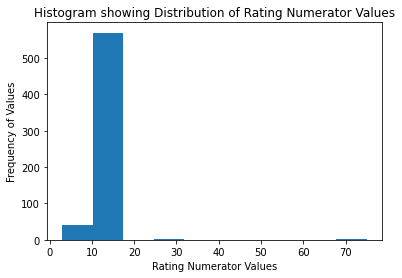

In [540]:
# Plotting distribution of rating numerators between 3 and 75
plt.hist(twitter_master_df['rating_numerator'], range = (3, 75));
plt.xlabel('Rating Numerator Values')
plt.ylabel('Frequency of Values')
plt.title('Histogram showing Distribution of Rating Numerator Values')
plt.show()

* The histogram of the distribution of rating numerator values shows that the distribution is left-skewed
* Hence, majority of the ratings are between values 5 and 15
* There are a few outlier values (around 30 and 70)

#### 2. Scatter Plot of Retweets vs Favorites

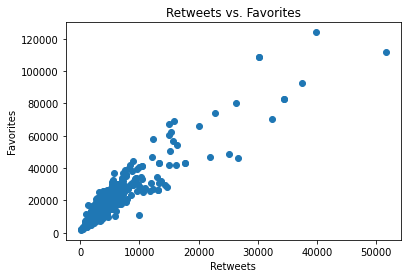

In [550]:
# Scatter plot of retweets vs favorites
plt.scatter(twitter_master_df['retweet_count'], twitter_master_df['favorite_count'])
plt.title('Retweets vs. Favorites')
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()

* The scatter plot of Retweets vs Favorites shows that there is a strong positive correlation between the two variables
* This implies that the tweet of a dog which was added to favorites is likely to be retweeted, and vice versa

#### 3. Horizontal Bar Chart of Dog Stages Counts

In [541]:
# Function to plot horizontal bar chart

def draw_horizontal_bar(data_series, title):
  ax = data_series.plot(kind="barh", figsize=(10, 6), color='#86bf91', zorder=2, width=0.85)
  ax.set_title(title, weight='bold', size=12)
  # Draw vertical axis lines
  vals = ax.get_xticks()
  for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    

In [542]:
# Displaying unique value counts of dog_stage column
twitter_master_df['dog_stage'].value_counts()

None       537
doggo       34
pupper      30
puppo       11
floofer      2
Name: dog_stage, dtype: int64

In [543]:
# Creating Dataframe of records where dog stage is not "None"
dog_stage_df = twitter_master_df[twitter_master_df['dog_stage'] != "None"]
dog_stage_df.shape

(1615, 32)

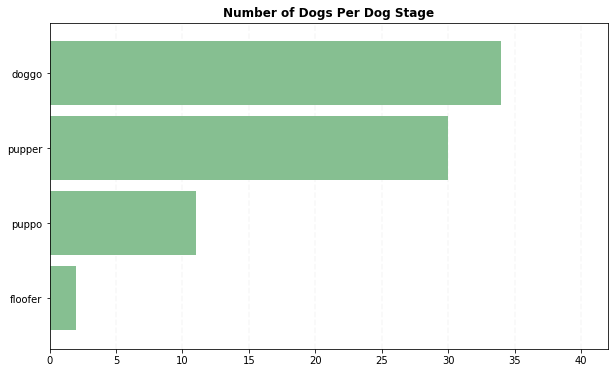

In [544]:
# Calling function to draw chart
draw_horizontal_bar(dog_stage_df['dog_stage'].value_counts().sort_values(), 'Number of Dogs Per Dog Stage')

* The "doggo" stage has the highest number of dogs in the dataset; followed by "pupper", and "puppo"
* The "floofer" stage has the least number of dogs